# Random Walk Example 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [104]:
import numpy as np
def metropolis_multigaus(target,proposal,thin,niters,dim):
    post = np.zeros((niters,dim))
    current = proposal.rvs()
    accept = 0
    for i in range(thin*niters):
        post_p = current + proposal.rvs()
        rho = min(1, target.pdf(post_p)/target.pdf(current))
        u = np.random.uniform()
        if u < rho:
            accept += 1
            current = post_p
        if i % thin < 1:
            post[i//thin,:] = current
    return(post,accept/(niters*thin))

def plot_iters(vec):
    plt.plot(range(len(vec)),vec, 'o')
    plt.axis([-5,len(vec),min(vec) - .5,max(vec) + .5])
    plt.show()


In [90]:
mu = np.array([0,0])
cov_mat = np.array([[1,.98],[.98,1]])

mu_prop = np.array([0,0])
cov_prop = np.array([[.18**2,0],[0,.18**2]])
target2d = stats.multivariate_normal(mu,cov_mat)
proposal2d = stats.multivariate_normal(mu_prop,cov_prop)

res, ratio = metropolis_multigaus(target2d,proposal2d,20,200,2)


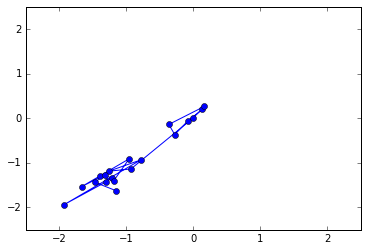

In [111]:
plt.plot(res[0:19,0],res[0:19,1], '-o')
plt.axis([-2.5,2.5,-2.5,2.5])
plt.show()

pass

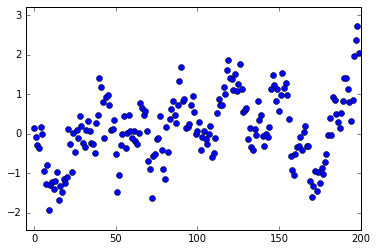

In [105]:
plot_iters(res[:,0])

In [94]:
mu_100 = np.zeros(100)
cov_100 = np.diag([i/100 for i in range(1,101)])

In [126]:
mu_prop100 = np.zeros(100)
cov_prop100 = np.diag(np.repeat(stats.uniform.rvs(0.0176,0.0264)**2,100))
target_100d = stats.multivariate_normal(mu_100,cov_100)
proposal_100d = stats.multivariate_normal(mu_prop100,cov_prop100)

res100, ratio100 = metropolis_multigaus(target_100d,proposal_100d,150,1000,100)


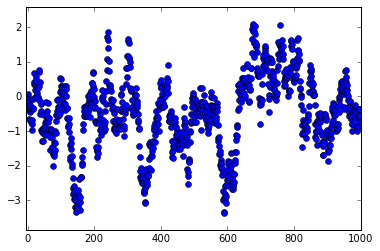

In [127]:
plot_iters(res100[:,99])

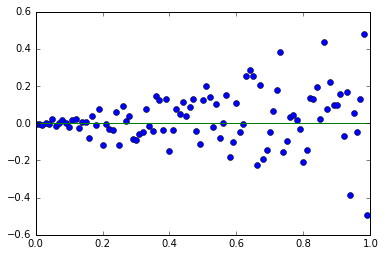

In [135]:
vec0 = res100.mean(0)
plt.plot([i/100 for i in range(len(vec0))],vec0,'o')
plt.plot([0,1],[0,0])
pass

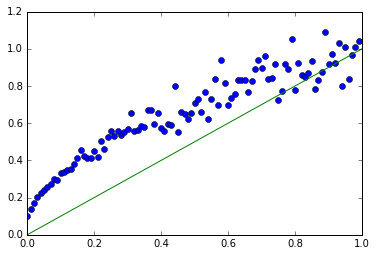

In [136]:
vec1 = res100.std(0)
plt.plot([i/100 for i in range(len(vec1))],vec1,'o')
plt.plot([0,1],[0,1])
pass